In [139]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [140]:
!chmod 600 /root/.kaggle/kaggle.json

In [141]:
!kaggle datasets download -d jsphyg/tipping

tipping.zip: Skipping, found more recently modified local copy (use --force to force download)


In [142]:
!unzip tipping.zip

Archive:  tipping.zip
replace tips.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: tips.csv                


In [143]:
import pandas as pd
import numpy as np

In [144]:
data=pd.read_csv("tips.csv")

In [145]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [146]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [147]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [149]:
smoke_cat=data['smoker'].value_counts()
smoke_cat

No     151
Yes     93
Name: smoker, dtype: int64

In [150]:
time_cat=data['time'].value_counts()
time_cat

Dinner    176
Lunch      68
Name: time, dtype: int64

In [151]:
gender=data['sex'].value_counts()
gender

Male      157
Female     87
Name: sex, dtype: int64

In [152]:
import seaborn as sb

<Axes: xlabel='sex', ylabel='tip'>

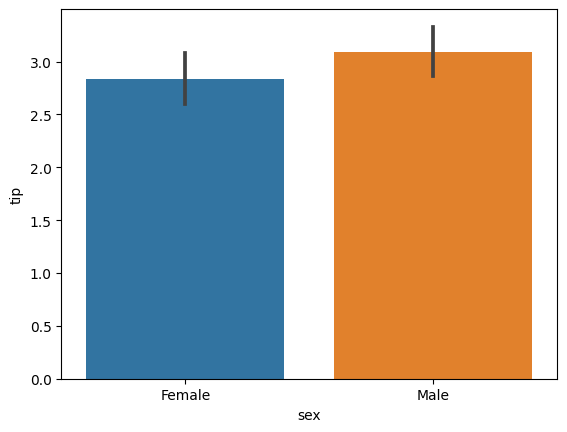

In [153]:
sb.barplot(x='sex',y='tip',data=data)

<Axes: xlabel='smoker', ylabel='tip'>

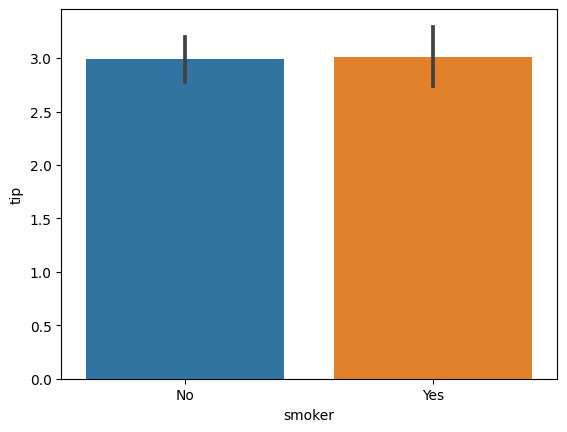

In [154]:
sb.barplot(x='smoker',y='tip',data=data)

<Axes: xlabel='day', ylabel='tip'>

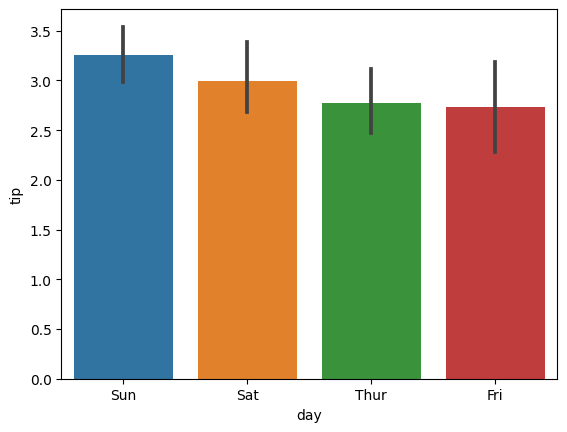

In [155]:
sb.barplot(x='day',y='tip',data=data)

<Axes: xlabel='time', ylabel='tip'>

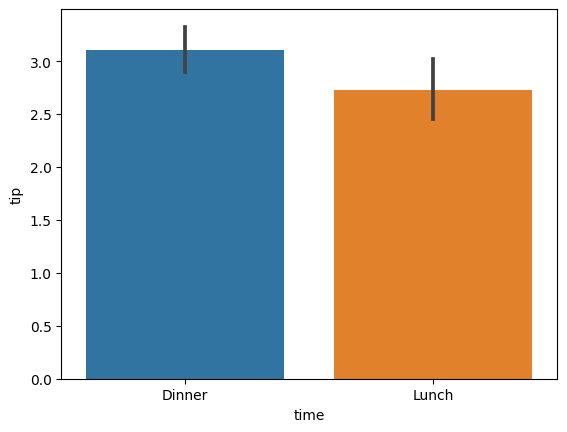

In [156]:
sb.barplot(x='time',y='tip',data=data)

<Axes: xlabel='size', ylabel='tip'>

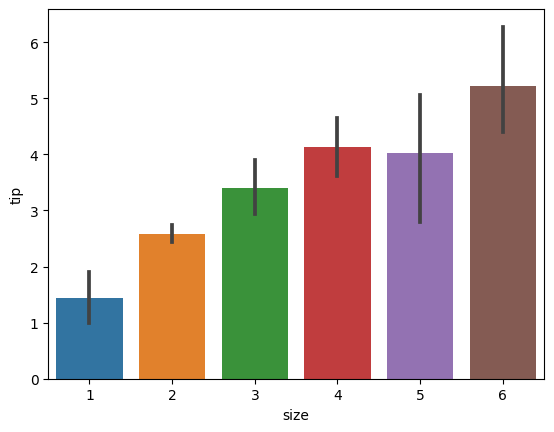

In [157]:
sb.barplot(x='size',y='tip',data=data)

In [158]:
corr=np.corrcoef(data['tip'],data['total_bill'])

In [159]:
print(corr)

[[1.         0.67573411]
 [0.67573411 1.        ]]


In [160]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [161]:
data['day']=data['day'].map({'Sun':1,'Sat':2,'Thur':3,'Fri':4})
data['sex']=data['sex'].map({'Male':1,'Female':0})
data['time']=data['time'].map({'Dinner':1,'Lunch':0})
data['smoker']=data['smoker'].map({'Yes':1,'No':0})

In [162]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,1,1,2
1,10.34,1.66,1,0,1,1,3
2,21.01,3.50,1,0,1,1,3
3,23.68,3.31,1,0,1,1,2
4,24.59,3.61,0,0,1,1,4


In [163]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'relation between taotal_bill and tip')

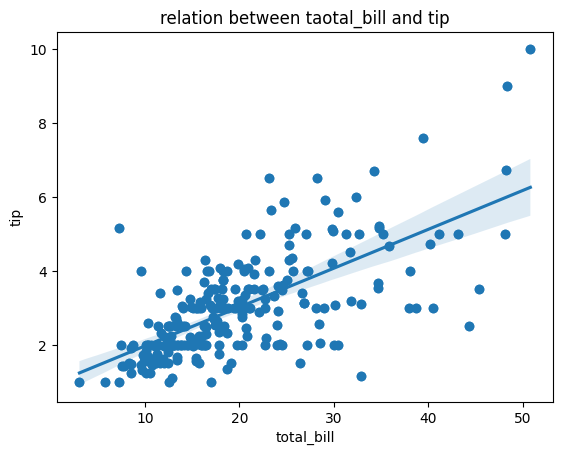

In [164]:
plt.scatter(data['total_bill'],data['tip'])
sb.regplot(x=data['total_bill'],y=data['tip'])
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.title("relation between taotal_bill and tip")

In [165]:
import plotly.express as px
import plotly.graph_objects as go

In [166]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [167]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [168]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

In [169]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

In [170]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

In [171]:
x=np.array(data[['total_bill','sex','smoker','day','time','size']])
y=np.array(data[['tip']])

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [174]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [175]:
model.fit(xtrain,ytrain)

LinearRegression()

In [176]:
model.score(xtest,ytest)

0.4441710487905043

In [177]:
pred=model.predict(xtest)

In [178]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([[3.90920033]])